# Fundamentos IA y Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 2
<p>Entrenamiento y evaluación:<br>Calcular métricas de evaluación en regresión, clasificación binaria y multiclase.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
import numpy as np
import math

# Trabajar con dataset
import pandas as pd

# Presentación de datos
import seaborn as sns
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

En base al conjunto de datos con una variable objetivo real y salida proporcionada con dos modelos distintos.

<div style="font-size:14px; text-align:justify"><b>1: </b>Calcular métricas de regresión para cada modelo.</div>

In [157]:
# Cargar el dataset
df = pd.read_csv('l2p1.csv')

display(df.head(), 'Total resultados:', df.count())

,Y objetivo,Predicciones M1,Predicciones M2
0,2.50,3.0,2.0
1,3.00,2.9,2.0
2,1.60,2.0,2.0
3,8.00,8.1,7.0
4,4.56,4.0,5.0


'Total resultados:'

Y objetivo         30
Predicciones M1    30
Predicciones M2    30
dtype: int64

<div style="font-size:14px; text-align:center"><b>MAE</b><br></div>

In [34]:
# ERROR ABSOLUTO MEDIO (Mean Absolute Error)
def mae(pred, obj):
    '''
    Media de las diferencias absolutas entre y' e y
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += abs(y - y_pred)
    
    # Media del sumatorio de errores
    return round(dif/len(pred), 2)

print(f'''MAE de "Predicciones M1": {mae(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''MAE de "Predicciones M2": {mae(df['Predicciones M2'], df['Y objetivo'])}''')

MAE de "Predicciones M1": 1.04
MAE de "Predicciones M2": 0.61


<div style="font-size:14px; text-align:center"><b>MSE</b><br></div>

In [36]:
# ERROR CUADRÁTICO MEDIO  (Mean Squared Error)
def mse(pred, obj):
    '''
    Media de las diferencias al cuadrado entre y' e y
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += (y - y_pred)**2
    
    # Media del sumatorio de errores
    return round(dif/len(pred), 2)

print(f'''MSE de "Predicciones M1": {mse(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''MSE de "Predicciones M2": {mse(df['Predicciones M2'], df['Y objetivo'])}''')
    

MSE de "Predicciones M1": 7.98
MSE de "Predicciones M2": 0.52


<div style="font-size:14px; text-align:center"><b>RMSE</b><br></div>

In [41]:
# RAIZ CUADRADA DEL ERROR CUADRÁTICO MEDIO  (Root Mean Squared Error)
def rmse(pred, obj):
    '''
    Raiz de MSE para igualar medidas del error y variable objetivo
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += (y - y_pred)**2
    
    # Raiz cuadrada de la media del sumatorio de errores
    return round(math.sqrt(round(dif/len(pred), 2)),2)

print(f'''RMSE de "Predicciones M1": {rmse(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''RMSE de "Predicciones M2": {rmse(df['Predicciones M2'], df['Y objetivo'])}''')

RMSE de "Predicciones M1": 2.82
RMSE de "Predicciones M2": 0.72


<div style="font-size:14px; text-align:center"><b>COEFICIENTE R</b><br></div>

In [156]:
# COEFICIENTE DE DETERMINACIÓN
def r_2(pred, obj):
    '''
    Calidad para predecir resultados. Acotado entre 0 y 1
    '''
    ss_res = 0
    ss_tot = 0
    for y_pred, y in zip(pred, obj):
        ss_res += (y - y_pred)**2
        ss_tot += (y - obj.mean())**2
        
    return round(1-(ss_res/ss_tot), 10)

# COEFICIENTE DE VARIACIÓN
def r_pearson(pred,obj):
    sum_covar = 0
    pred_var = 0
    obj_var = 0
    for y_pred, y in zip(pred, obj):
        sum_covar += (y_pred - pred.mean())*(y - obj.mean())
        pred_var += (y_pred - pred.mean())**2
        obj_var += (y - obj.mean())**2
        
    return round((sum_covar**2/(pred_var*obj_var)) ,10)
    
print(f''' Coeficiente determinación de "Predicciones M1": {r_2(df['Predicciones M1'], df['Y objetivo'])}''')
print(f''' Coeficiente variación de Pearson de "Predicciones M1": {r_pearson(df['Predicciones M1'], df['Y objetivo'])}''')
print(f''' Coeficiente determinación de "Predicciones M2": {r_2(df['Predicciones M2'], df['Y objetivo'])}''')
print(f''' Coeficiente variación de Pearson de "Predicciones M2": {r_pearson(df['Predicciones M2'], df['Y objetivo'])}''')

 Coeficiente determinación de "Predicciones M1": 0.5991824683
 Coeficiente variación de Pearson de "Predicciones M1": 0.6280712461
 Coeficiente determinación de "Predicciones M2": 0.9737934691
 Coeficiente variación de Pearson de "Predicciones M2": 0.9785384481


<div style="font-size:14px; text-align:justify"><b>2: </b>Decidir que modelo es mejor.</div>

En base al **coeficiente de determinación** el mejor modelo se trata de **M1**. Dado que este valor se aproxima más a 1, lo cual nos indica que es capaz de precedecir mejor, tiene menor error, como también lo demuestra RMSE, con un valor inferior al igual que MSE y MAE (Media de errores inferior).

Además, como se aprecia en la siguiente gráfica, los valores para **M1**, coindicen un número mayor de veces así como quedar más cercanos a la curva objetivo.

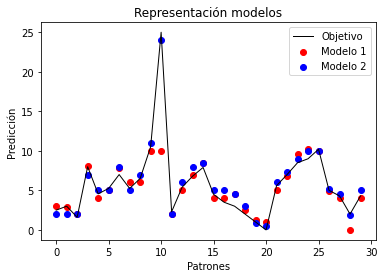

In [190]:
fig, ax = plt.subplots()
# Plot 'Y Objetivo'
obj, = ax.plot(df.index, df['Y objetivo'], color="black", linewidth=1, label='Objetivo')
# Plot Prediccion modelos
mod_1 = plt.scatter(df.index, df['Predicciones M1'], color="red", label='Modelo 1')
mod_2 = plt.scatter(df.index, df['Predicciones M2'], color="blue", label='Modelo 2')

ax.legend()
plt.title('Representación modelos')
plt.xlabel('Patrones')
plt.ylabel('Predicción')
plt.show()

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

En base a un problema de clasificación binaria, existe la salida para dos patrones distintos.

<div style="font-size:14px; text-align:justify"><b>1: </b>Crear la matriz de confusión de cada modelo.</div>

In [192]:
# Cargar el dataset
df = pd.read_csv('l2p2.csv')

display(df.head(), 'Total resultados:', df.count())

,Clase Objetivo,Predicciones M1,Predicciones M2
0,0,1,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1


'Total resultados:'

Clase Objetivo     30
Predicciones M1    30
Predicciones M2    30
dtype: int64

In [240]:
def conf_matrix(pred, obj):
    '''
    Obtener la cantidad de aciertos y fallos del modelo
    '''
    tp=0
    tn=0
    fp=0
    fn=0
    for y_pred, y in zip(pred, obj):
        # True Positive
        if y == 1 and y_pred == 1:
            tp += 1
        # False Negative
        elif y == 1 and y_pred == 0:
            fn += 1
        # False Positive
        elif y == 0 and y_pred == 1:
            fp += 1
        # True Negative
        elif y == 0 and y_pred == 0:
            tn += 1
    
    return tp, fn, fp, tn

tp_m1, fn_m1, fp_m1, tn_m1 = conf_matrix(df['Predicciones M1'], df['Clase Objetivo'])
tp_m2, fn_m2, fp_m2, tn_m2 = conf_matrix(df['Predicciones M2'], df['Clase Objetivo'])

# Modelo 1
print(f'Matriz Confusion Modelo 1 para {tp_m1+fn_m1+fp_m1+tn_m1} valores')
print(f'''True Positive:  {tp_m1} | False Negative: {fn_m1}\n
False Positive: {fp_m1} | True Negative: {tn_m1}\n''')
# Modelo 2
print(f'Matriz Confusion Modelo 2 para {tp_m2+fn_m2+fp_m2+tn_m2} valores')
print(f'''True Positive:  {tp_m2} | False Negative: {fn_m2}\n
False Positive: {fp_m2} | True Negative: {tn_m2}\n''')

Matriz Confusion Modelo 1 para 30 valores
True Positive:  6 | False Negative: 4

False Positive: 1 | True Negative: 19

Matriz Confusion Modelo 2 para 30 valores
True Positive:  9 | False Negative: 1

False Positive: 8 | True Negative: 12



De un modo más visual:

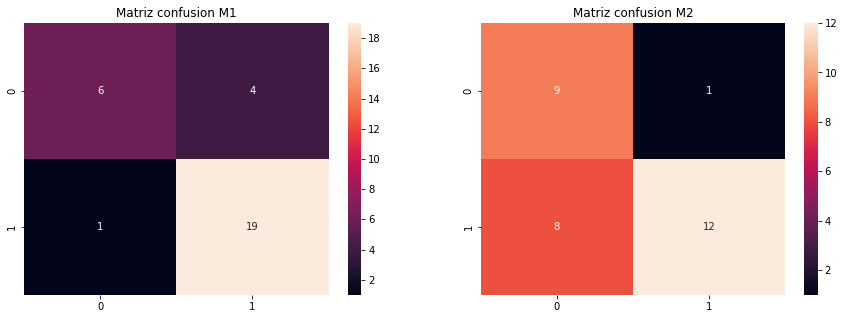

In [241]:
# Obtener valores
cf_matrix_m1 = conf_matrix(df['Predicciones M1'], df['Clase Objetivo'])
cf_matrix_m2 = conf_matrix(df['Predicciones M2'], df['Clase Objetivo'])

# Convertir en array
cf_matrix_m1 = np.asarray([[cf_matrix_m1[0],cf_matrix_m1[1]], [cf_matrix_m1[2],cf_matrix_m1[3]]])
cf_matrix_m2 = np.asarray([[cf_matrix_m2[0],cf_matrix_m2[1]], [cf_matrix_m2[2],cf_matrix_m2[3]]])

# Plotear matrices
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.heatmap(cf_matrix_m1, annot=True, ax=axes[0]).set(title='Matriz confusion M1')
sns.heatmap(cf_matrix_m2, annot=True, ax=axes[1]).set(title='Matriz confusion M2')

plt.show()

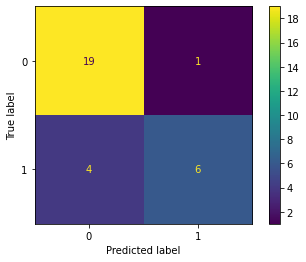

In [270]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Generate predictions with the model using our X values
y_pred = df['Predicciones M1']
y = df['Clase Objetivo']
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

<div style="font-size:14px; text-align:justify"><b>2: </b>Calcular métricas de clasificación salvo AUC.</div>

<div style="font-size:14px; text-align:center"><b>Accuracy - CCR</b><br></div>

In [268]:
# PRECISIÓN GLOBAL
def ccr (data, tp, tn, fp=None):
    '''
    Patrones correctamente clasificados
    '''
    return round(((tp+tn)/len(data)), 2)
    # return tp/(tp+fp)

print(ccr(df['Predicciones M1'], tp_m1, tn_m1))
print(ccr(df['Predicciones M2'], tp_m2, tn_m2))

0.83
0.7


<div style="font-size:14px; text-align:center"><b>Recall - TP Rate</b><br></div>

In [252]:
# SENSIBILIDAD
def sensibility (tp, fn):
    return ((tp)/(tp+fn))

print(sensibility(tp_m1, fn_m1))
print(sensibility(tp_m2, fn_m2))

0.6
0.9


<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

Describir la base de datos.

<div style="font-size:14px; text-align:justify"><b>1: </b>Cargar y presentar el dataframe.</div>

In [2]:
df = pd.read_csv('iris.csv')

df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [3]:
# Total de variedades y numero por cada una.
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

<div style="font-size:14px; text-align:justify"><b>2: </b>Explicación base de datos.</div>

**Información base de datos**<br>
Conjunto de longitudes de sepalo y petalo para diferentes variedades de flor Iris.

**Atributos**<br>
- "sepal.length": Longitus del sepalo.
- "sepal.width": Anchura del sepalo.
- "petal.length": Longitud del petalo.
- "petal.width": Anchura del petalo.

**Variable objetivo**<br>
- "variety": Variedad de la especie de acuerdo con medidas de petalo y sepalo.

**Patrones por clase**<br>
- Clase "Setosa" 50 patrones.
- Clase "Versicolor" 50 patrones.
- Clase "Virginica" 50 patrones.

<div style="font-size:14px; text-align:justify"><b>TERCERA PARTE.-</b><br></div>

Por cada atributo calcular:
- Media.
- Desviación típica.
- Mediana.
- Cuartiles.
- Minimo y máximo.

***Fuente:***<br>
*https://www.statology.org/<br>
http://cissandbox.bentley.edu/sandbox/wp-content/uploads/2022-02-10-Documentation-on-f-strings-Updated.pdf<br>
http://www.rincondepaco.com.mx/rincon/Inicio/Apuntes/Descriptiva.pdf*

<div style="font-size:14px; text-align:center"><b>MEDIA</b><br></div>

In [4]:
def calc_mean(data):
    '''
    Suma de todos los valores existentes dividido por el total de datos.
    '''
    total = data.sum()
    n_data = data.count()
    
    return total/n_data

display(f'Media para "sepal.length": {calc_mean(df.iloc[:, 0]):0.2f}')
display(f'Media para "sepal.width": {calc_mean(df.iloc[:, 1]):0.2f}')
display(f'Media para "petal.length": {calc_mean(df.iloc[:, 2]):0.2f}')
display(f'Media para "petal.width": {calc_mean(df.iloc[:, 3]):0.2f}')

'Media para "sepal.length": 5.84'

'Media para "sepal.width": 3.06'

'Media para "petal.length": 3.76'

'Media para "petal.width": 1.20'

<div style="font-size:14px; text-align:center"><b>DESVIACIÓN TÍPICA</b><br></div>

In [5]:
def calc_standar_dev(data):
    '''
    Raíz cuadrada de la suma cuadrárica de las diferencias de los valores respecto a la media
    dividido por el total de valores.
    '''
    mean = calc_mean(data)
    deviation_sum = 0
    for num in data:
        deviation = (num - mean)**2
        deviation_sum += deviation
    
    return math.sqrt(deviation_sum/data.count())

display(f'Desviacion típica "sepal.length": {calc_standar_dev(df.iloc[:, 0]):0.2f}')
display(f'Desviacion típica "sepal.width": {calc_standar_dev(df.iloc[:, 1]):0.2f}')
display(f'Desviacion típica "petal.length": {calc_standar_dev(df.iloc[:, 2]):0.2f}')
display(f'Desviacion típica "petal.width": {calc_standar_dev(df.iloc[:, 3]):0.2f}')

'Desviacion típica "sepal.length": 0.83'

'Desviacion típica "sepal.width": 0.43'

'Desviacion típica "petal.length": 1.76'

'Desviacion típica "petal.width": 0.76'

La desviación típica, nos dice si los valores se encuentran en torno a una media en cuanto más bajo sea el valor obtenido. En este caso, los valores de "sepal.width" se encuentran más cercanos a la media, mientras que "petal.width" tiene una mayor dispersión de los datos respecto a la media.

<div style="font-size:14px; text-align:center"><b>MEDIANA</b><br></div>

In [6]:
def calc_median(data):
    '''
    Valor que deja por debajo y por el encima el mismo numero de valores en una lista de 
    valores ordenada de forma ascendente.
    '''
    data = data.sort_values(ascending = True)
    middle = data.count() / 2
    if data.count() % 2 == 0:
        middle_values = data.iloc[(int(middle) - 1)] + data.iloc[int(middle)]
        # Indices de 0 n. Restar 1 para posición media
        return middle_values / 2
    else:
        return data.iloc[int(middle)]
        
    
display(f'Mediana "sepal.length": {calc_median(df.iloc[:, 0]):0.2f}')
display(f'Mediana "sepal.width": {calc_median(df.iloc[:, 1]):0.2f}')
display(f'Mediana "petal.length": {calc_median(df.iloc[:, 2]):0.2f}')
display(f'Mediana "petal.width": {calc_median(df.iloc[:, 3]):0.2f}')

'Mediana "sepal.length": 5.80'

'Mediana "sepal.width": 3.00'

'Mediana "petal.length": 4.35'

'Mediana "petal.width": 1.30'

La mediana nos da el valor central que deja por debajo y por arriba el mismo numero de valores del set de datos. Dentro de los cuartiles, también es el Q2 o el 50%.

<div style="font-size:14px; text-align:center"><b>CUARTILES</b><br></div>

In [7]:
def calc_q1(data):
    '''
    Valor que deja por debajo al 25% de los valores de una lista ordenada ascendentemente.
    '''
    data = data.sort_values(ascending = True)    
    pos = (data.count()) / 4
    
    return  data.iloc[math.floor(pos)] if pos % 1 == 0 \
        else (data.iloc[math.floor(pos)] + data.iloc[math.ceil(pos)]) / 2

def calc_q3(data):
    '''
    Valor que deja por debajo al 75% de los valores de una lista ordenada ascendentemente.
    '''
    data = data.sort_values(ascending = True)    
    pos = (3 * data.count() + 1) / 4 - 1
    
    return  data.iloc[math.floor(pos)] if pos % 1 == 0 \
        else (data.iloc[math.floor(pos)] + data.iloc[math.ceil(pos)]) / 2
 
display(f'Q1 "sepal.length": {calc_q1(df.iloc[:, 0]):0.2f}; Q3 "sepal.length": {calc_q3(df.iloc[:, 0]):0.2f}')
display(f'Q1 "sepal.width": {calc_q1(df.iloc[:, 1]):0.2f}; Q3 "sepal.width": {calc_q3(df.iloc[:, 1]):0.2f}')
display(f'Q1 "petal.length": {calc_q1(df.iloc[:, 2]):0.2f}; Q3 "petal.length": {calc_q3(df.iloc[:, 2]):0.2f}')
display(f'Q1 "petal.width": {calc_q1(df.iloc[:, 3]):0.2f}; Q3 "petal.width": {calc_q3(df.iloc[:, 3]):0.2f}')
    

'Q1 "sepal.length": 5.10; Q3 "sepal.length": 6.40'

'Q1 "sepal.width": 2.80; Q3 "sepal.width": 3.30'

'Q1 "petal.length": 1.60; Q3 "petal.length": 5.10'

'Q1 "petal.width": 0.30; Q3 "petal.width": 1.80'

El cuartil Q1 representa el 25% de los datos mientras que el Q3 el 75%. PAra el cuartil Q2, este es igual a la mediana.

<div style="font-size:14px; text-align:center"><b>MÍNIMO Y MÁXIMO</b><br></div>

In [8]:
def calc_min_max(data):
    '''
    De una lista ordenanada ascendentemente, el valor más pequeño y el más grande respectivamente.
    '''
    return data.sort_values().iloc[0], data.sort_values().iloc[-1]

display(f'Min "sepal.length": {calc_min_max(df.iloc[:, 0])[0]:0.2f}; Max "sepal.length": {calc_min_max(df.iloc[:, 0])[1]:0.2f}')
display(f'Min "sepal.width": {calc_min_max(df.iloc[:, 1])[0]:0.2f}; Max "sepal.width": {calc_min_max(df.iloc[:, 1])[1]:0.2f}')
display(f'Min "petal.length": {calc_min_max(df.iloc[:, 2])[0]:0.2f}; Max "petal.length": {calc_min_max(df.iloc[:, 2])[1]:0.2f}')
display(f'Min "petal.width": {calc_min_max(df.iloc[:, 3])[0]:0.2f}; Max "petal.width": {calc_min_max(df.iloc[:, 3])[1]:0.2f}')

'Min "sepal.length": 4.30; Max "sepal.length": 7.90'

'Min "sepal.width": 2.00; Max "sepal.width": 4.40'

'Min "petal.length": 1.00; Max "petal.length": 6.90'

'Min "petal.width": 0.10; Max "petal.width": 2.50'

<div style="font-size:14px; text-align:justify"><b>CUARTA PARTE.-</b><br></div>

De forma gráfica, visualizar la elación de los atributos. ¿Existe alguna relación significativa visualmente?

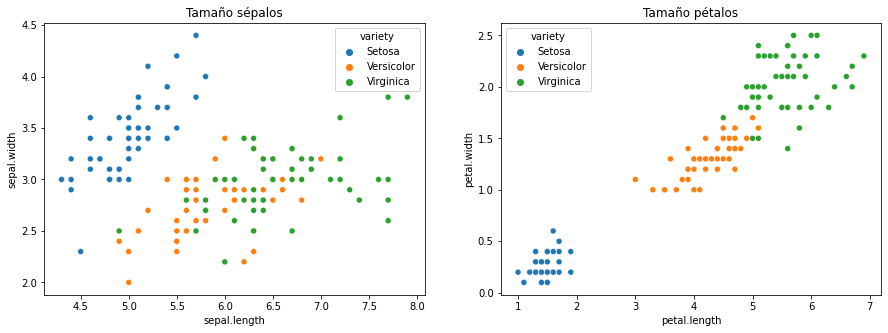

In [9]:
# SCATTER-PLOT de la anchura y longitud para los petlaos y sepalos por especie.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.scatterplot(data=df, x='sepal.length',y='sepal.width',hue='variety', ax=axes[0]).set(title='Tamaño sépalos')
sns.scatterplot(data=df, x='petal.length',y='petal.width',hue='variety', ax=axes[1]).set(title='Tamaño pétalos')

plt.show()

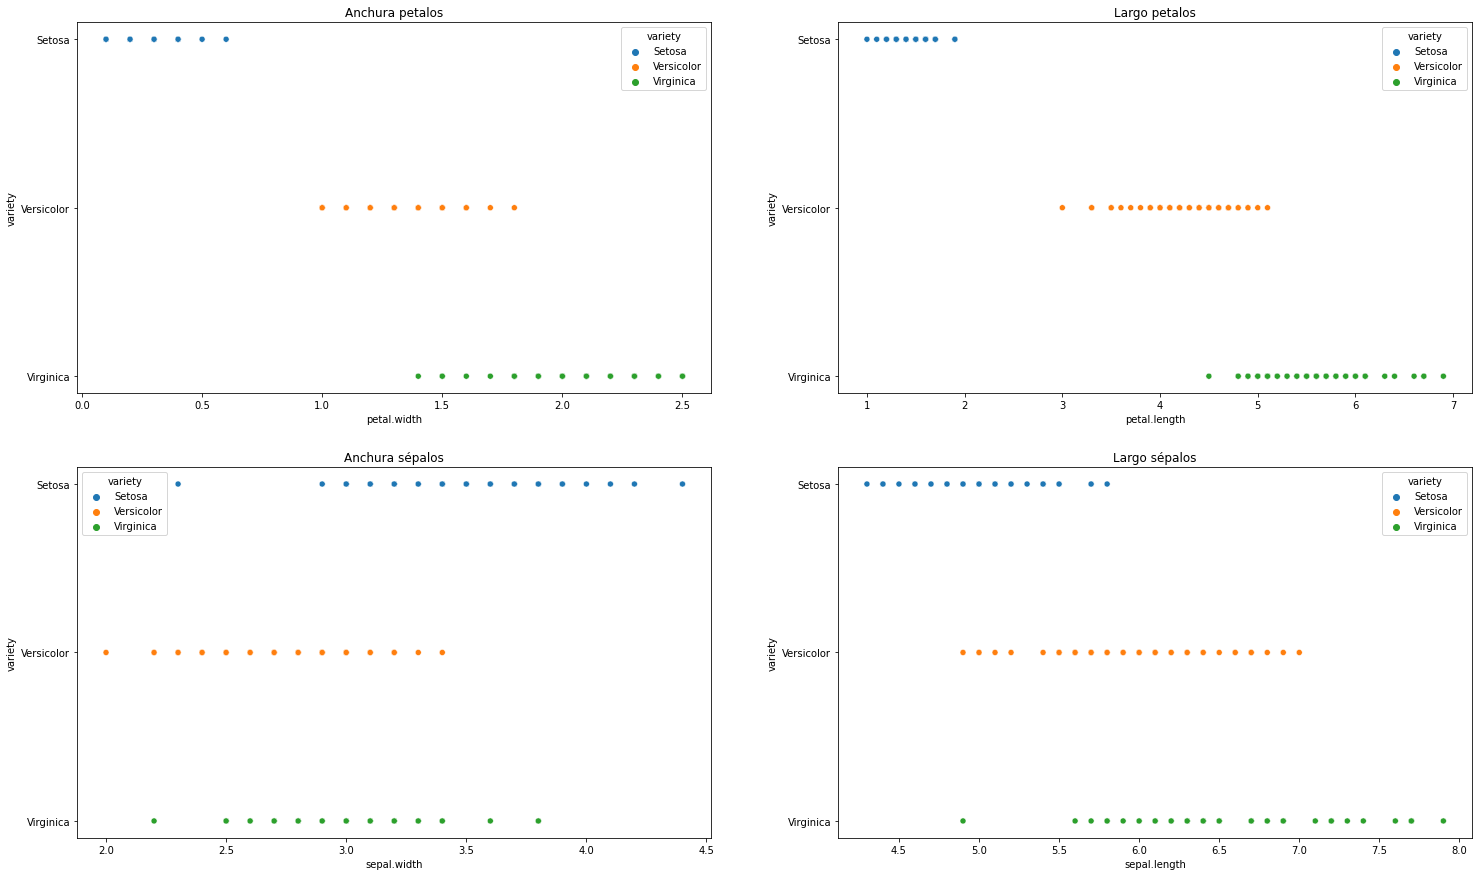

In [10]:
# SCATTER-PLOT para cada atributo por variedad.
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(25,15))

sns.scatterplot(data=df, x='petal.width',y='variety',hue="variety", ax=axes[0,0]).set(title='Anchura petalos')
sns.scatterplot(data=df, x='petal.length',y='variety',hue="variety", ax=axes[0,1]).set(title='Largo petalos')
sns.scatterplot(data=df, x='sepal.width',y='variety',hue="variety", ax=axes[1,0]).set(title='Anchura sépalos')
sns.scatterplot(data=df, x='sepal.length',y='variety',hue="variety", ax=axes[1,1]).set(title='Largo sépalos')

plt.show()

***CONCLUSIÓN:*** <br>
Mientras que los sepalos de Virginica y Versicolor no tienen claras diferencias en tamaño, para Setosa, encontramos que estos son más estrechos y con tendencia a ser más anchos.<br>
En el caso del tamaño de los pétalos si se observa mayor segregación de las especies. Para Setosa, vemos que los petalos son más estrechos y cortos, es decir, más pequeño. Siguiuendo con los siguientes más grandes, Versicolor, y finalmente los petalos más largos y anchos son los de Virginica.

<div style="font-size:14px; text-align:justify"><b>QUINTA PARTE.-</b><br></div>

Realizar un histograma para los atributos de entrada respecto a la variable objetivo.

***Fuente:***<br>
*https://seaborn.pydata.org/tutorial/distributions.html?highlight=histogram*

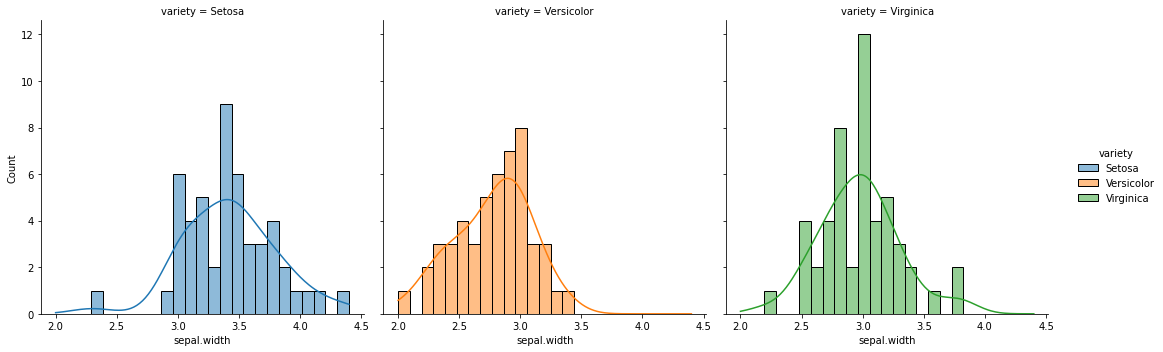

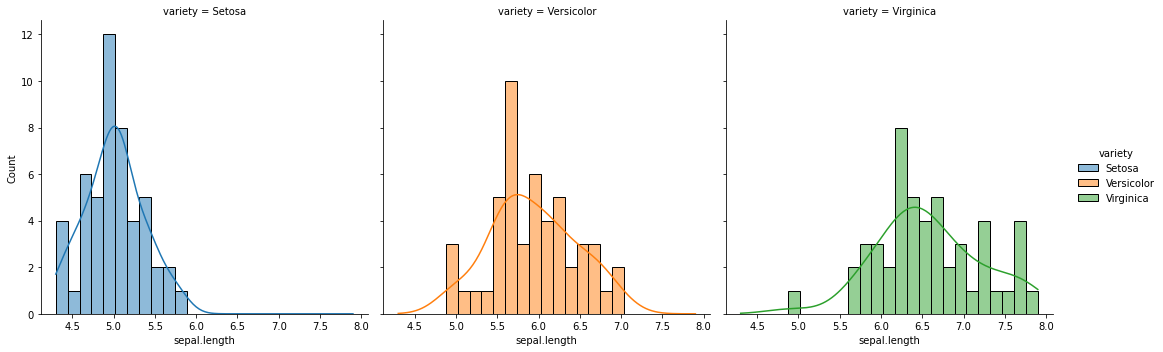

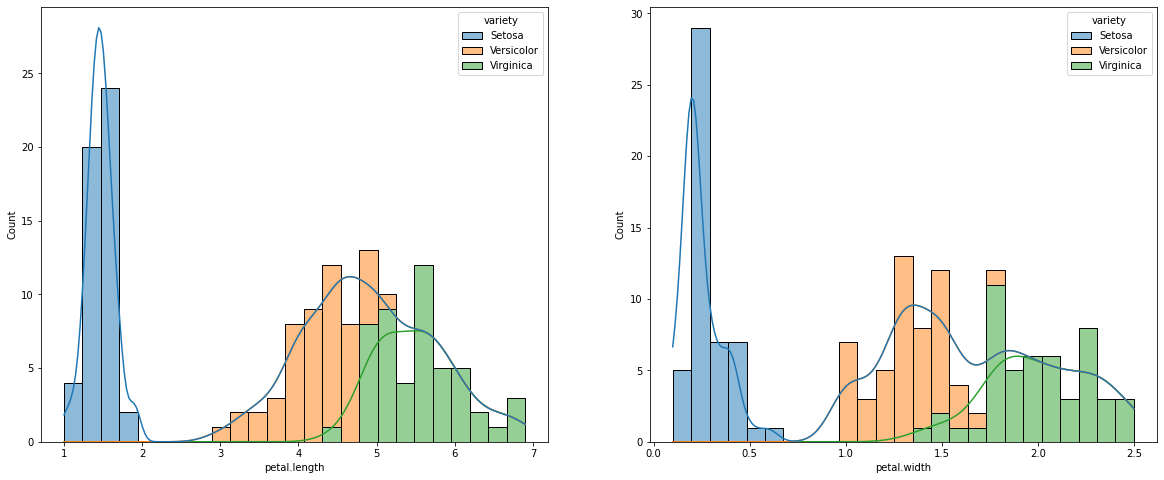

In [11]:
# Histograma para los sépalos por variedad.
sns.displot(data=df, x='sepal.width', hue="variety", bins=25, col='variety', kde=True)
sns.displot(data=df, x='sepal.length', hue="variety", bins=25, col='variety', kde=True)

# Histograma para los pétalos por variedad.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.histplot(data=df, x='petal.length', hue="variety", multiple='stack', bins=25, kde=True, ax=axes[0])
sns.histplot(data=df, x='petal.width', hue="variety", multiple='stack', bins=25, kde=True, ax=axes[1])

plt.show()

<div style="font-size:14px; text-align:justify"><b>SEXTA PARTE.-</b><br></div>

En el caso de que existiera valores perdidos, ¿qué técnica emplearía para recuperarlos?.

<div style="font-size:14px; text-align:justify"><b>1: </b>Preparar el dataframe.</div>

Dado que no existe valores perdidos en este dataframe, se va a simular que si existe valroes perdidos, añadiendo **NaN** a determinados valores de columnas numéricas.

In [12]:
import numpy as np

In [13]:
# Copiado del dataframe
df_NaN = df

df_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df_NaN.describe()

for col in df_NaN.columns:
    display(col)
    if col != 'variety':
        df_NaN.loc[df_NaN.sample(frac=0.1).index, col] = np.nan
    
df.info()

'sepal.length'

'sepal.width'

'petal.length'

'petal.width'

'variety'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  135 non-null    float64
 1   sepal.width   135 non-null    float64
 2   petal.length  135 non-null    float64
 3   petal.width   135 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<div style="font-size:14px; text-align:justify"><b>2: </b>Rellenear los valores perdidos.</div>

Para aplicar los valores faltantes en el dataset, emplearía la **mediana para cada una de las especies**. De este modo, se obtiene valores sin añadir dispersión a los datos.

In [15]:
# Crear dataframe con valores de Setosa.
setosa = df_NaN[df_NaN['variety'] == 'Setosa']
setosa.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,44.000000,45.000000,45.000000,48.000000
mean,4.984091,3.440000,1.464444,0.247917
std,0.351702,0.391036,0.179843,0.107168
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [16]:
# Crear dataframe con valores de Virginica.
virginica = df_NaN[df_NaN['variety'] == 'Virginica']
virginica.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,46.000000,46.000000,44.000000,46.000000
mean,6.606522,2.986957,5.572727,2.017391
std,0.659765,0.327691,0.580442,0.279924
min,4.900000,2.200000,4.500000,1.400000
25%,6.200000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,7.050000,3.200000,5.925000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [17]:
# Crear dataframe con valores de Versicolor.
versicolor = df_NaN[df_NaN['variety'] == 'Versicolor']
versicolor.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,45.000000,44.000000,46.000000,41.000000
mean,5.946667,2.777273,4.300000,1.326829
std,0.506144,0.321236,0.448206,0.188447
min,4.900000,2.000000,3.300000,1.000000
25%,5.600000,2.575000,4.000000,1.200000
50%,5.900000,2.800000,4.400000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.700000


In [18]:
# Rellenar dataframe Setosa con mediana y comparar resultados.
display(setosa.describe())
setosa = setosa.fillna(setosa[['sepal.length','sepal.width','petal.width','petal.length']].median())
setosa.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,44.000000,45.000000,45.000000,48.000000
mean,4.984091,3.440000,1.464444,0.247917
std,0.351702,0.391036,0.179843,0.107168
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


,sepal.length,sepal.width,petal.length,petal.width
count,50.000000,50.000000,50.000000,50.000000
mean,4.986000,3.436000,1.468000,0.246000
std,0.329508,0.370747,0.170761,0.105386
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.100000,3.675000,1.500000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [19]:
# Rellenar dataframe Virginica con mediana y comparar resultados.
display(virginica.describe())
virginica = virginica.fillna(virginica[['sepal.length','sepal.width','petal.width','petal.length']].median())
virginica.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,46.000000,46.000000,44.000000,46.000000
mean,6.606522,2.986957,5.572727,2.017391
std,0.659765,0.327691,0.580442,0.279924
min,4.900000,2.200000,4.500000,1.400000
25%,6.200000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,7.050000,3.200000,5.925000,2.300000
max,7.900000,3.800000,6.900000,2.500000


,sepal.length,sepal.width,petal.length,petal.width
count,50.000000,50.000000,50.000000,50.000000
mean,6.598000,2.988000,5.576000,2.016000
std,0.632936,0.314052,0.543819,0.268298
min,4.900000,2.200000,4.500000,1.400000
25%,6.225000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.175000,5.875000,2.275000
max,7.900000,3.800000,6.900000,2.500000


In [20]:
# Rellenar dataframe Versicolor con mediana y comparar resultados.
display(versicolor.describe())
versicolor = versicolor.fillna(versicolor[['sepal.length','sepal.width','petal.width','petal.length']].median())
display(versicolor.describe())

,sepal.length,sepal.width,petal.length,petal.width
count,45.000000,44.000000,46.000000,41.000000
mean,5.946667,2.777273,4.300000,1.326829
std,0.506144,0.321236,0.448206,0.188447
min,4.900000,2.000000,3.300000,1.000000
25%,5.600000,2.575000,4.000000,1.200000
50%,5.900000,2.800000,4.400000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.700000


,sepal.length,sepal.width,petal.length,petal.width
count,50.000000,50.000000,50.000000,50.000000
mean,5.942000,2.780000,4.308000,1.322000
std,0.479834,0.301019,0.430396,0.170581
min,4.900000,2.000000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.300000
50%,5.900000,2.800000,4.400000,1.300000
75%,6.275000,3.000000,4.600000,1.475000
max,7.000000,3.400000,5.100000,1.700000


In [21]:
# Reunir de nuevo los valores en un único dataframe y comparar resultados.
display(df_NaN.describe())
df_new = pd.concat([setosa, versicolor, virginica])

display(df_new.describe())

,sepal.length,sepal.width,petal.length,petal.width
count,135.000000,135.000000,135.000000,135.000000
mean,5.857778,3.069630,3.769630,1.178519
std,0.846015,0.442563,1.770541,0.774248
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.842000,3.068000,3.784000,1.194667
std,0.827162,0.427623,1.771288,0.755453
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.525000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Si comparamos los valores para la desviación tipica entre el dataframe con NaN y el modificado. Se observa que se ha conseguido disminuir la dispersión de los valores en todas las columnas numéricas.

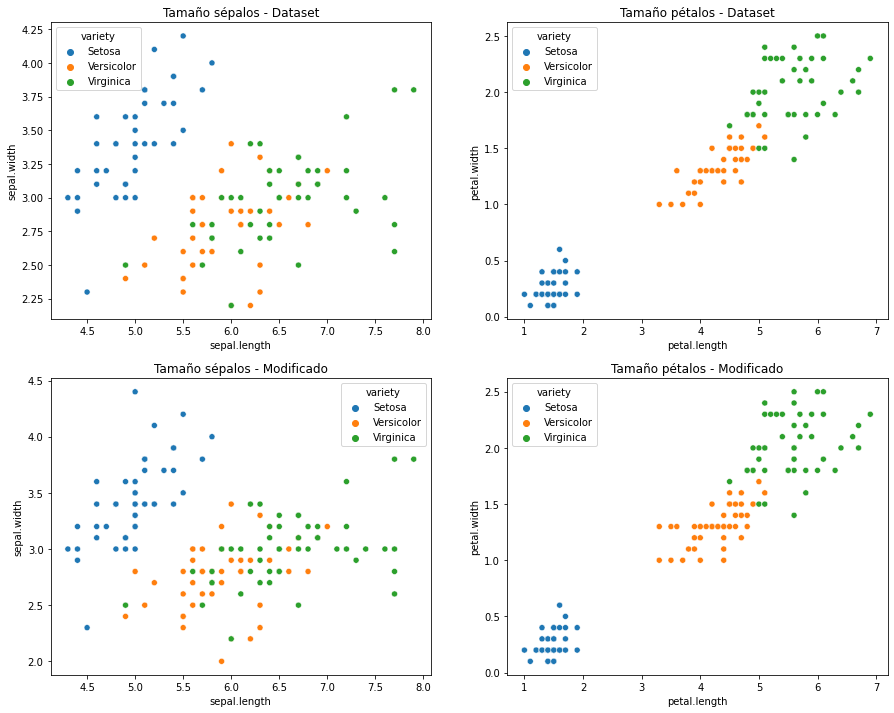

In [22]:
# Ploteo de los resultados del dataset completo con el rellenado
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,12))

sns.scatterplot(data=df, x='sepal.length',y='sepal.width',hue='variety', ax=axes[0,0]).set(title='Tamaño sépalos - Dataset')
sns.scatterplot(data=df, x='petal.length',y='petal.width',hue='variety', ax=axes[0,1]).set(title='Tamaño pétalos - Dataset')

sns.scatterplot(data=df_new, x='sepal.length',y='sepal.width',hue='variety', ax=axes[1,0]).set(title='Tamaño sépalos - Modificado')
sns.scatterplot(data=df_new, x='petal.length',y='petal.width',hue='variety', ax=axes[1,1]).set(title='Tamaño pétalos - Modificado')

plt.show()

***CONCLUSIÓN:***<br>
Si se compara con los scatter del dataframe intacto, apenas varía los resultados.

<div style="font-size:14px; text-align:justify"><b>SEPTIMA PARTE.-</b><br></div>

¿Se trata de un dataset balanceado?

Para cumplir el balanceo, el numero de patrones por cada clase ha de ser la misma. En este caso, se trata de un dataset balanceado ya que tiene todos el mismo numero de patrones, 50.

In [23]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64